Korteweg de Vries equation
======================================================================

This page shows how the [Korteweg-de Vries
equation](http://en.wikipedia.org/wiki/Korteweg-de_Vries_equation) can
be solved on a periodic domain using the [method of
lines](http://www.scholarpedia.org/article/Method_of_lines), with the
spatial derivatives computed using the pseudo-spectral method. In this
method, the derivatives are computed in the frequency domain by first
applying the FFT to the data, then multiplying by the appropriate values
and converting back to the spatial domain with the inverse FFT. This
method of differentiation is implemented by the **diff** function in the
module **scipy.fftpack**.

We discretize the spatial domain, and compute the spatial derivatives
using the **diff** function defined in the **scipy.fftpack** module. In
the following code, this function is given the alias **psdiff** to avoid
confusing it with the numpy function **diff**. By discretizing only the
spatial dimension, we obtain a system of ordinary differential
equations, which is implemented in the function **kdv(u, t, L)**. The
function **kdv\_solution(u0, t, L)** uses **scipy.integrate.odeint** to
solve this system.

In [1]:
import numpy as np

In [2]:
def kdv_exact(x, c):
    """Profile of the exact solution to the KdV for a single soliton on the real line."""
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

In [3]:
from scipy.fftpack import diff

def kdv(t, u, L):
    """Differential equations for the KdV equation, discretized in x."""
    # Compute the x derivatives using the pseudo-spectral method.
    ux = diff(u, period=L)
    uxxx = diff(u, period=L, order=3)

    # Compute du/dt.    
    dudt = -6*u*ux - uxxx

    return dudt

Set the size of the domain, and create the discretized grid.

In [4]:
L = 50.0
N = 64
dx = L / (N - 1.0)
x = np.linspace(0, (1 - 1.0 / N) * L, N)

Set the initial conditions.
Not exact for two solitons on a periodic domain, but close enough...

In [5]:
u0 = kdv_exact(x - 0.33 * L, 0.75) + kdv_exact(x - 0.65 * L, 0.4)

Set the time sample grid.

In [6]:
T = 200
t = np.linspace(0, T, 501)

In [7]:
from scipy.integrate import solve_ivp

solution = solve_ivp(kdv, [0, T], u0, t_eval=t, args=(L,))
solution

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  4.000e-01 ...  1.996e+02  2.000e+02]
        y: [[ 9.348e-07  5.012e-05 ...  1.899e-01  1.910e-01]
            [ 1.839e-06 -4.310e-05 ...  2.025e-01  1.980e-01]
            ...
            [ 3.353e-05  7.005e-05 ...  1.267e-01  1.237e-01]
            [ 2.046e-05 -2.365e-05 ...  1.703e-01  1.583e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 61304
     njev: 0
      nlu: 0

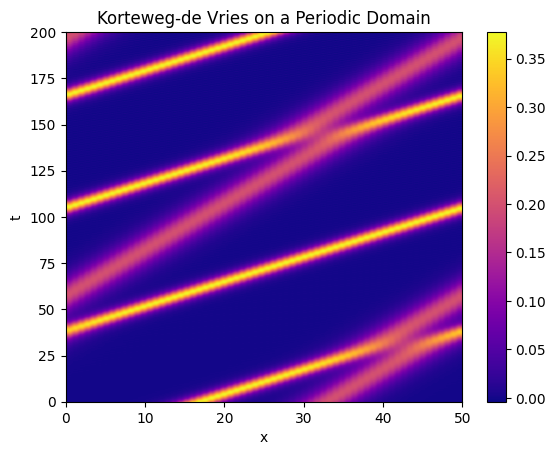

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(solution.y[:, ::-1].T, aspect='auto', extent=[0, L, 0, T], cmap='plasma')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Korteweg-de Vries on a Periodic Domain');